# 1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

en resumen : aremos una segmentacion para que a cada cliente se le ofrezca el anuncio adecuado 
## marketing 
- Es importante para el crecimiento y sostenibilidad de cualquier negocio
- los especialistas en marketing pueden ayudar a desarrollar la marca de las empresas, atraer mas clientes.
![alt text](https://drive.google.com/uc?id=1iBuWfpl1xoGUya8xc2Ucxb4hSWpo-oNR)

- Uno de los puntos críticos para los especialistas en marketing es conocer a sus clientes e identificar sus necesidades.
- Al comprender al cliente, los especialistas en marketing pueden lanzar una campaña de marketing dirigida que se adapte a necesidades específicas.
- Si los datos sobre los clientes están disponibles, la ciencia de datos se puede aplicar para realizar la segmentación del mercado.
- En este caso práctico, nos han contratado como expertos en data
science para una empresa de minorista de análisis de Seattle, U.S.
- La empresa tiene muchos datos de sus clientes de los últimos 2 años y medio.
- Se nos encomienda la tarea de crear campañas de marketing enfocadas a los clientes, dividiéndolos para ello en por lo menos 3 segmentos diferentes
  - ORDERNUMER: Identificador del pedido
  - QUANTITYORDERED: Número de ítems comprados
  - PRICEEACH: Precio de cada ítem
  - SALES: Total de ventas efectuads
  - ORDERDATE: Fecha del pedido realizado
  - STATUS: Estado del pedido
  - QTR_ID: Trimestre en el que se hace el pedido
  - MONTH_ID: Mes en el que se hace el pedido 
  - YEAR_ID: Año en el que se hace el pedido
  - PRODUCTLINE: Categoría del Producto
  - CUSTOMERNAME: Nombre del cliente
  - PHONE: Número de teléfono
  - ADDRESSLINE1: Dirección de envío . #ADDRESSLINE2: Dirección de envío
  - CITY: Ciudad en la que reside el cliente
  - STATE: Estado en el que reside el cliente
  - POSTALCODE: Código postal del cliente
  - COUNTRY: País en el que reside el cliente
  - TERRITORY: Territorio en el que reside el cliente . # DEALSIZE: Tamaño del pedido
  - CONTACTFIRST NAME: Nombre del contacto
  - CONTACTLAST NAME: Apellido del contacto
  - MSRP es el precio minorista sugerido por el fabricante (MSRP) o el precio de etiqueta representa el precio minorista sugerido de los productos. Se utiliza para estandarizar el precio de los productos en varias ubicaciones de tiendas de la empresa.

ten en consideracion que algunas de las caracteristicas no seran utiles y las descharemos.
Fuente de Datos : https://www.kaggle.com/kyanyoga/sample-sales-data

https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-5-Finance-AI.zip

#2: IMPORTAR LIBRERÍAS Y DATASETS

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import sklearn as sk

import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [45]:
# descargamos el dataset de la pagina del curso: https://frogames.es/masterclass-en-ia-moderna-crea-6-proyectos/
!wget --no-check-certificate \
   https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-4-Marketing-AI.zip \
    -O /tmp/Healthcare-ai.zip

--2022-03-24 04:44:52--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P96-Section-4-Marketing-AI.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.106.66
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.106.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9523902 (9.1M) [application/zip]
Saving to: ‘/tmp/Healthcare-ai.zip’

/tmp/Healthcare-ai. 100%[===================>]   9.08M  --.-KB/s    in 0.1s    

2022-03-24 04:44:52 (78.8 MB/s) - ‘/tmp/Healthcare-ai.zip’ saved [9523902/9523902]



In [46]:
# reutilizaremos codigo del caso anterior 
print("files of dataset directory: ")
%cd /tmp
print("-"*50)
print("Extracting files the dataset: ")
!unzip -u /tmp/Healthcare-ai.zip
!unzip -u /tmp/AI+in+Marketing+Dataset.zip
print("-"*50)
print("\n unpackaged dataset: ")
!ls "/tmp/AI in Marketing Dataset"

files of dataset directory: 
/tmp
--------------------------------------------------
Extracting files the dataset: 
Archive:  /tmp/Healthcare-ai.zip
Archive:  /tmp/AI+in+Marketing+Dataset.zip
--------------------------------------------------

 unpackaged dataset: 
autoencoder.h5	sales_data_sample.csv


In [47]:
sales_df = pd.read_csv("/tmp/AI in Marketing Dataset/sales_data_sample.csv", encoding="unicode_escape")

In [48]:
sales_df.head().T

,0,1,2,3,4
ORDERNUMBER,10107,10121,10134,10145,10159
QUANTITYORDERED,30,34,41,45,49
PRICEEACH,95.7,81.35,94.74,83.26,100.0
ORDERLINENUMBER,2,5,2,6,14
SALES,2871.0,2765.9,3884.34,3746.7,5205.27
ORDERDATE,2/24/2003 0:00,5/7/2003 0:00,7/1/2003 0:00,8/25/2003 0:00,10/10/2003 0:00
STATUS,Shipped,Shipped,Shipped,Shipped,Shipped
QTR_ID,1,2,3,3,4
MONTH_ID,2,5,7,8,10
YEAR_ID,2003,2003,2003,2003,2003


## escalado de datos 
cuando trabajamos con caracteristicas que varian el orden de magnitud es importante homogenizar esa escala, para que de este modo el modelo no de mas puntuacion a las caracteristicas con una escala muy grande.
por ejemplo la variable precio puede llegar a tener valores altos mientras la variable cantidad bajos, y puede que la coantidad sea mas importante que el precio.  


## EDA 
vemos que la mayoria de variables son categoricas. 

In [49]:
sales_df["ORDERDATE"] = pd.to_datetime(sales_df["ORDERDATE"])

In [50]:
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [51]:
print(sales_df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


## eliminacion de variables inutiles 
en este punto nos damos cuenta que hay variables con muchos datos nulos, pero que ademas, inferiendo de forma logica no es muy importante. 
hay otras variables que no tiene mucha relevancia como el numero de orden que no tiene sentido conservar asi que las quitamos. vemos que tenemos muchas varabñles de referencia geografica, asi que nos quedamos solo con una el pais


In [52]:
drop_list = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 
             'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(drop_list, axis= 1) # axis=1 indica que se eliminen las columnas, axis=0 elimina la muestra 
print(sales_df.isnull().sum())

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64


In [53]:
print(sales_df.nunique())
print("-"*50)
print(sales_df["COUNTRY"].value_counts())


QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64
--------------------------------------------------
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64


 # 3: ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 1

# ANALISIS de variables categoricas

## graficacion express interactiva con plotly.express

crearemos una función para visualizar el recuento de elementos en una columna determinada.

Ten en cuenta que Plotly es una librería de gráficos de Python que crea gráficos interactivos con calidad de publicación.
Compruébalo en: https://plotly.com/python/

Nota: px (plotly_express) es un wrapper de alto nivel entorno a plotly para una rápida exploración de datos y generación de figuras
 Compruébalo en: https://plotly.github.io/plotly_express


In [54]:
def barplot_express(x):
  fig = plt.Figure(figsize=(12,6))
  fig = px.bar(x=sales_df[x].value_counts().index, # damos las etiquetas del eje de X
               y= sales_df[x].value_counts(), # damos los numeros del eje de la Y
               color=sales_df[x].value_counts().index, # vamos a dar un color por cada pais
               height= 300) # la altrua del grafico 
  fig.show()

In [55]:
barplot_express("COUNTRY")

## que hacer con variable desbalanceada 
en general siempre que tenemos una variable categorica, es recomendado hacer un anlisis de dispersion, lo mas sncillo es crear un grafico de barras, de esta forma podremos evaluar rapidamente si la variable esta desbalanceada o no. 
en el caso de la variable "ESTATUS" vemos que esta exageradamente desbalanceado, por lo cual la variable no sirve para nada, ya que casi todas las muestras entran en shipped. hay varias opciones:
- quitar la variables (columna). cuando esta muy desvalanceado
- pedir al recolector de datos que de mas muestras de las categoriasajas, y asi poder utilizar la variable estatus 

In [56]:
barplot_express("STATUS")

In [57]:
sales_df.drop(columns=["STATUS"], inplace=True) # inplace nos ahorra poner df = df.drop() como se uso atras 
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [58]:
barplot_express("PRODUCTLINE")

In [59]:
barplot_express("DEALSIZE")

## que se hace con las variables categoricas
las categorias en ML y python se tratan como variables dummies (ficticias). en resumen las categorias de una variable pasan a ser columnas con un formato one hot encoding. recordemos que un modelo no trabaja con str tenemos que transformar todo dato a numeros. 

In [60]:
# creamos una funcion para transformar variables categoricas a dummies
def dummies_c(x):
  dum = pd.get_dummies(sales_df[x]) # creamos las columnas dummies
  sales_df.drop(columns=[x], inplace=True) # borramos la columna original
  return pd.concat([sales_df, dum], axis= 1) # axadimos dummies, axis=1 = columnas 

In [61]:
sales_df = dummies_c("COUNTRY") # convertimos country
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1


In [62]:
# convertimos las categorias faltantes 
sales_df = dummies_c("DEALSIZE")
sales_df = dummies_c("PRODUCTLINE")

## arreglar una variables categorica con muchas categorias
si revisemos cuantas categorias (usando sales_df.unique()) tiene la variable PRODCUTCODE vemos que tiene 109 categorias por lo cual seria insostenible tener un dataset con 140 columnas, por lo cual **cuando tenemos muchas categorias no convertimos a variables dummies si no a categoricas**.
en lugar de ser un formato onehotencoding a cada categoria se le asigna un indice numerico.


In [63]:
def categorical_c(x):
  indx = pd.Categorical(sales_df[x]).codes # creamos una columna con los indices de cada categoria 
  sales_df[x] = indx
  return sales_df

sales_df = categorical_c("PRODUCTCODE")

#4: ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA - PARTE 2



In [64]:
# creamos un nuevo dataframe para agrupar los datos pendiendo la fecha 
sales_df_g = sales_df.groupby("ORDERDATE").sum()

## aprovechando el tipo dato dateframe 
MINI RETO 6: 
- Según los datos, ¿cuándo alcanzan su punto máximo las ventas (en qué mes)?
- Apoya tu respuesta con visualizaciones / gráficos
### graficar n_ventas a lo largo del año usando groupby 
los dataframe nos serviran para visualizar la evolucion de las variables en el tiempo. por ejemplo podemos graficar en que temporada del año hay mas ventas. 
ten en consideracion que despues de hacer estas visulizaciones tenemos que eliminar es columna para que ahora si el dataset solo contenga variables numericas. 
si fueramos a hacer un estudio de series temporales seria util pero en este caso no, ya que aqui solo vamos a hacer clustering 

In [65]:
  fig = plt.Figure(figsize=(12,6))
  fig = px.line(x=sales_df_g.index, 
               y= sales_df_g["SALES"],
               height= 300) # la altrua del grafico 
  fig.show()

In [66]:
# despues de haber usado la variable dateframe lo podemos desechar 

print(sales_df.shape)
sales_df.drop(columns=["ORDERDATE"], axis=1, inplace=True)
print(sales_df.shape)

(2823, 39)
(2823, 38)


## matriz de correlaciones 
nos servira para revisar que variables a simplevista tienen relacion. Nos servira para ver si algunas variables tienen mucha relacion, y de esta forma eliminar algunas, ya que aportarian la misma informacion al modelo 
- vemos que el RSMP(precio sugerido) y el priceeach(precio unitario) tienen relacion y es obvio intuir por que.
- vemos que las variables de cuatrimestre y mes estan muy relacionadas. por lo cual dejaremos la mas exacta (mes) y la otra la borraremos. 

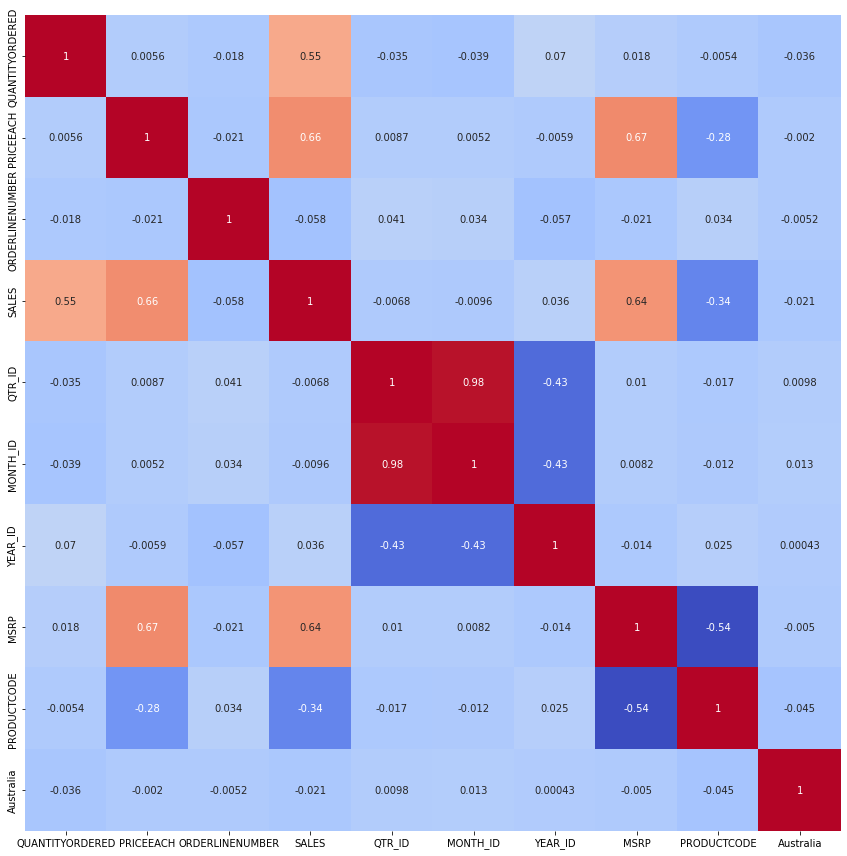

In [67]:
plt.figure(figsize=(15,15)) 
sns.heatmap(sales_df.iloc[:, :10].corr(), # solo incluiremos todas las filas de la columna 0-10 (evitando las dummies)
            annot=True, square=True, cbar=False, cmap='coolwarm')  
plt.show()

## graficamos las distribuciones usando (1) histograma, (2) kde plot y (3) rug plot.
- (1) Histograma: es una visualización gráfica de datos que usa barras con varias alturas. Cada barra agrupa los números en rangos y las barras más altas muestran que hay más datos en ese rango.
- (2) Densidad: la estimación de la función de densidad se utiliza para visualizar la densidad de probabilidad de una variable continua.
- (3) Gráfico de alfombra: gráfico de datos para una única variable cuantitativa, que se muestra como marcas a lo largo de un eje (gráfico de dispersión unidimensional).


In [68]:
sales_df.head().T

,0,1,2,3,4
QUANTITYORDERED,30.0,34.00,41.00,45.00,49.00
PRICEEACH,95.7,81.35,94.74,83.26,100.00
ORDERLINENUMBER,2.0,5.00,2.00,6.00,14.00
SALES,2871.0,2765.90,3884.34,3746.70,5205.27
QTR_ID,1.0,2.00,3.00,3.00,4.00
MONTH_ID,2.0,5.00,7.00,8.00,10.00
YEAR_ID,2003.0,2003.00,2003.00,2003.00,2003.00
MSRP,95.0,95.00,95.00,95.00,95.00
PRODUCTCODE,0.0,0.00,0.00,0.00,0.00
Australia,0.0,0.00,0.00,0.00,0.00


In [69]:
import plotly.figure_factory as ff

fig = plt.Figure(figsize=(8,6))
for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    col_name = sales_df.columns[i]
    fig = ff.create_distplot([sales_df[col_name].apply(lambda x: float(x))], ["displot"],
    show_hist=True, show_curve=True, show_rug=True) # solo coloco estos parametros para saber que existen 
    fig.update_layout(title_text = col_name)
    fig.show()
# para crear histogramas los datos deben ser float 
# tenemos que agregar la label ["displot"] para que se creen los 3 grafos 

### resultados  de observar la distribucion 
- QUANTITYORDERED:  la mayoria de pedidos piden entre 20-50 items 
- PRICEEACH: la mayoria de precios ronda los 100$
- YEAR ID:  esto es una variable discreta por lo caul no tien sentido graficar
- MONTH ID: vemos que la mayoria de ventas son en diciembre 
- MRSP: El precio sugerido esta muy distribuido 


## visualizar la relacion entre variables usando parcelas
en el ejemplo practico vamos a ver como varia cada variable respecto al mes. Esto nos permitira responder:
- En diciembre se venden articulos mas baratos o caros ?
- en verano bajan las ventas, por que sube  el precio unitario ?


In [70]:
fig = plt.Figure(figsize=(15,15))
fig = px.scatter_matrix(sales_df, 
                        sales_df.columns[:8], 
                        color= "MONTH_ID")

fig.update_layout(title= "sales data", 
           width=1100,
           height= 1100,)
fig.show()

- QUANTITYORDER + MONTH_ID: nos mustra que en le mes 4 es cuando mas ordenes hay
- vemos como hay mas ventas conforme aumentan los años 
vemos como se forman figuras de embudos en MRSP-PRICEEACH, y en SALES-QUANTITYORDER-PRICEEACH-MRSP lo que nos mustra una relacion entre variables. 

#5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL CLUSTERING CON K-MEANS
INTUICIÓN DETRÁS DE K-MEANS

- K-means es un algoritmo de aprendizaje no supervisado
 (clustering).

- K-means funciona agrupando algunos puntos de datos (clustering)
 de forma no supervisada.
- El algoritmo agrupa las observaciones con valores de atributos
 similares al medir la distancia euclidiana entre puntos.



## pasos del algoritmo k-means
1. Elegir el número de clústers "K"

2. Seleccionar K puntos aleatorios que serán los centroides de cada cluster

3. Asignar cada punto del dataset al centroide más cercano, hacerlo nos permitirá crear un número "K" de clústers con dichos puntos

4. Calcular un nuevo centroide para cada cluster

5. Reasignar cada punto de datos al nuevo centroide más cercano

6. Ir al paso 4 y repetir.
lo que queremos hacer es asignar cada mustra a un centroide, y  a la vez recolocar el centroide en un punto estrategico, donde se ajuste mejor a los ejemplos.

![alt text](https://drive.google.com/uc?id=192-KIqghB5e26Q5U1Xwvnus5b-GTXIph)

## funcion de coste whithin cluster sum of squares (WCSS)
en este punto te habras dado cuenta que el parametro mas importante es el numero de clusters(K) = centroides, asi que seleccionar el numero optimo sera una tarea importante. nostros usaremos:
- whithin cluster sum of squares (WCSS): sera nuestra funcion de coste, calcula la suma de las distancias de cada punto a su cluster mas cercano y lo eleva al cuadrado, entre mas distancia haya el WCSS es mayor.
 
![alt text](https://drive.google.com/uc?id=1rEaCYYfWvDcpQaoRh8EsApMtQPUZNB2o)

## metodo del codo: 
 cada vez que añadimos un nuevo cluster el WCSS baja pero llega un punto en el que la perdida se aplana y deja de bajar ese sera considerado el codo y tomaremos en cuenta el numero k elegido.
 
 ![alt text](https://drive.google.com/uc?id=1XuVfvEFiZefGuZqOgfznU4rRHjXNh8Qk)

 # 6: ENCUENTRE EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DE CODO
 - El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de conglomerados diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Fuente:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

## estandarizamos la escala de los datos (sk.preprocessing.StandardScaler())
si suministraramos los datos crudos como ahorita los tenemos, debido a que el modelo es ponderado sera alterado con mayor magnitud por las variables con numeros altos, y menos perjudicada por las qeu tienen valores pequeños. este problema se presenta cuando tenemos variables con magnitud de (0-10) yotras de (0-2000), para esto

In [88]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0


In [75]:
scaler = sk.preprocessing.StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [86]:
# podemos ver como el dataframe ya es un array con datos estandarizados  que van de -2.9 ,13.24
print(sales_df_scaled.max())
print(sales_df_scaled.min())
print(sales_df_scaled.mean())

sales_df_scaled[0:4, :] # imprimimos 4 muestras con sus 38 caracterisiticas 

13.245282178949607
-2.9870281067070685
-3.709229934799263e-17


array([[-0.52289086,  0.5969775 , -1.05705871, -0.37082523, -1.42703863,
        -1.39290889, -1.16517009, -0.14224584, -1.70278009, -0.26481859,
        -0.14096078, -0.10875641, -0.15945785, -0.15108305, -0.18354099,
        -0.3537647 , -0.14985203, -0.07549858, -0.20419945, -0.13698828,
        -0.17619466, -0.09641408, -0.16967642, -0.37127839, -0.14355269,
        -0.10537149, -0.23184348,  1.34601374, -0.24267205, -0.98070333,
         1.09637041, -0.72181225,  2.74384783, -0.34867363, -0.30063664,
        -0.16745383, -0.34547029, -0.52337077],
       [-0.11220131, -0.11445035, -0.34701507, -0.42789707, -0.59624258,
        -0.57233673, -1.16517009, -0.14224584, -1.70278009, -0.26481859,
        -0.14096078, -0.10875641, -0.15945785, -0.15108305, -0.18354099,
         2.82673767, -0.14985203, -0.07549858, -0.20419945, -0.13698828,
        -0.17619466, -0.09641408, -0.16967642, -0.37127839, -0.14355269,
        -0.10537149, -0.23184348, -0.74293447, -0.24267205, -0.98070333,
   